最小二乘解系数：
a$_0$ = -19.368807
a$_1$ = 28.123811
a$_2$= -8.879028
a$_3$= 0.096074


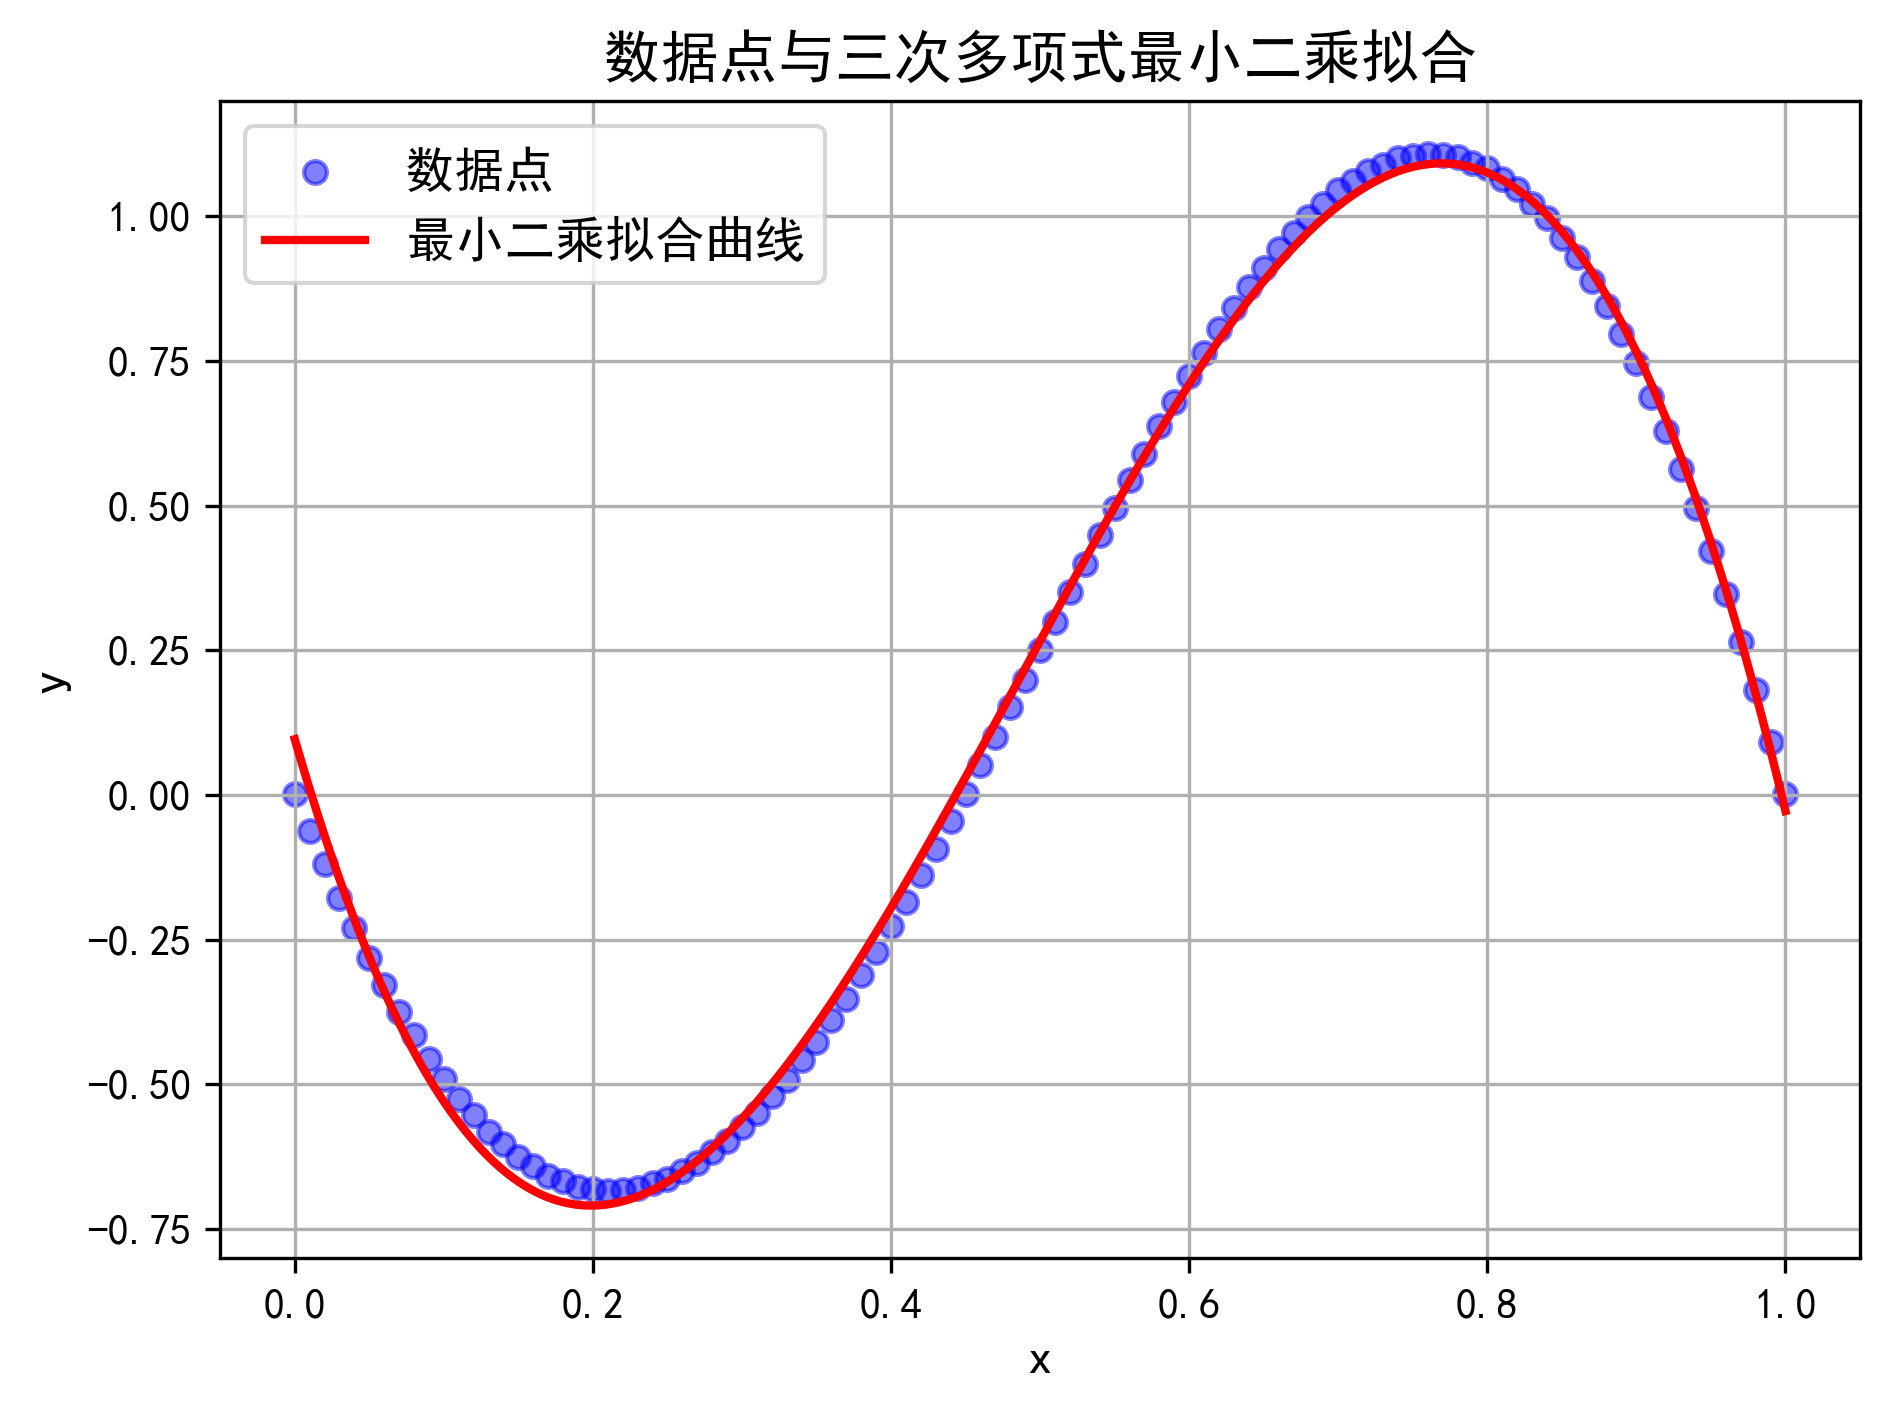

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.sans-serif'] = ['SimHei']  # 图中显示中文
plt.rcParams['axes.unicode_minus'] = False  # 图中正常显示负号
import matplotlib.pyplot as plt
from numpy.linalg import solve

def f(x):
    """原函数 f(x) = (x^2 + 4x - 2)sin(πx)"""
    return (x**2 + 4*x - 2) * np.sin(np.pi * x)

# 生成数据点
n = 101  # 0到100共101个点
i = np.arange(n)
x = i / 100
y = f(x) + (-1)**i * 1e-3  # 添加交替的误差项

# 构建最小二乘法的系数矩阵
A = np.vstack([x**3, x**2, x, np.ones_like(x)]).T
b = y

# 求解正规方程 (A^T A)x = A^T b
coef = solve(A.T @ A, A.T @ b)

# 定义三次多项式函数
def S(x, coef):
    """三次多项式 S(x) = a₃x³ + a₂x² + a₁x + a₀"""
    return coef[0]*x**3 + coef[1]*x**2 + coef[2]*x + coef[3]

# 生成用于画图的平滑曲线
x_smooth = np.linspace(0, 1, 1000)
y_smooth = S(x_smooth, coef)

# 绘图
plt.figure()
# 绘制散点
plt.scatter(x, y, color='blue', s=30, alpha=0.5, label='数据点')

# 绘制拟合曲线
plt.plot(x_smooth, y_smooth, 'red', linewidth=2, label='最小二乘拟合曲线')

plt.grid(True)
plt.legend(fontsize=12)
plt.title('数据点与三次多项式最小二乘拟合', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

# 打印拟合系数
print(f"最小二乘解系数：")
print(f"a₃ = {coef[0]:.6f}")
print(f"a₂ = {coef[1]:.6f}")
print(f"a₁ = {coef[2]:.6f}")
print(f"a₀ = {coef[3]:.6f}")
# 自动调整布局
plt.tight_layout()
plt.show()